# House Sales

Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib notebook

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings(action="ignore", module="sklearn", message="^Objective did not")

import locale
locale.setlocale(locale.LC_NUMERIC, '')
pd.options.display.float_format = '{:0,.02f}'.format

## Load Data

In [2]:
all_data = pd.read_csv('data/kc_house_data.csv', index_col=['id'])
print(all_data.shape)
print(all_data.price.describe())

(21613, 20)
count      21,613.00
mean      540,088.14
std       367,127.20
min        75,000.00
25%       321,950.00
50%       450,000.00
75%       645,000.00
max     7,700,000.00
Name: price, dtype: float64


## Explore data

<IPython.core.display.Javascript object>


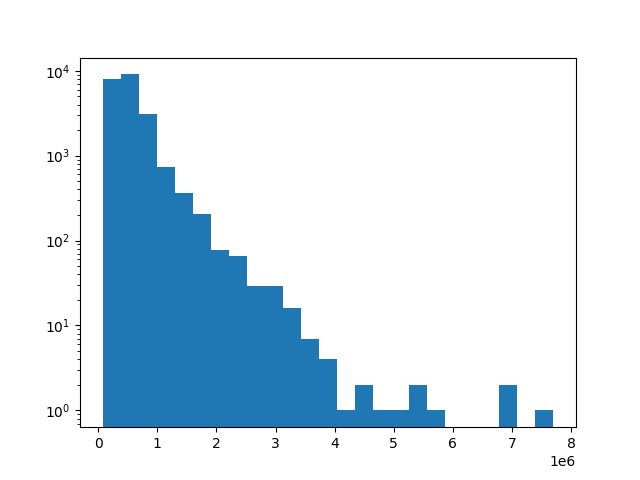

(array([  7.91200000e+03,   9.04900000e+03,   3.10200000e+03,
          7.40000000e+02,   3.66000000e+02,   2.04000000e+02,
          7.80000000e+01,   6.60000000e+01,   2.90000000e+01,
          2.90000000e+01,   1.60000000e+01,   7.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   75000.,   380000.,   685000.,   990000.,  1295000.,  1600000.,
         1905000.,  2210000.,  2515000.,  2820000.,  3125000.,  3430000.,
         3735000.,  4040000.,  4345000.,  4650000.,  4955000.,  5260000.,
         5565000.,  5870000.,  6175000.,  6480000.,  6785000.,  7090000.,
         7395000.,  7700000.]),
 <a list of 25 Patch objects>)

In [3]:
# This applies scientific notation (i.e. a x 10^b) to your x-axis tickmarks
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.hist(all_data[['price']].values, bins=25, log=True)

There are few houses that are very pricy. Lets see them:

In [4]:
all_data[all_data.price > 4e6].sort_values(by='price', ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6762700020,20141013T000000,"7,700,000.00",6,8.00,12050,27600,2.50,0,3,4,13,8570,3480,1910,1987,98102,47.63,-122.32,3940,8800
9808700762,20140611T000000,"7,062,500.00",5,4.50,10040,37325,2.00,1,2,3,11,7680,2360,1940,2001,98004,47.65,-122.21,3930,25449
9208900037,20140919T000000,"6,885,000.00",6,7.75,9890,31374,2.00,0,4,3,13,8860,1030,2001,0,98039,47.63,-122.24,4540,42730
2470100110,20140804T000000,"5,570,000.00",5,5.75,9200,35069,2.00,0,0,3,13,6200,3000,2001,0,98039,47.63,-122.23,3560,24345
8907500070,20150413T000000,"5,350,000.00",5,5.00,8000,23985,2.00,0,4,3,12,6720,1280,2009,0,98004,47.62,-122.22,4600,21750
7558700030,20150413T000000,"5,300,000.00",6,6.00,7390,24829,2.00,1,4,4,12,5000,2390,1991,0,98040,47.56,-122.21,4320,24619
1247600105,20141020T000000,"5,110,800.00",5,5.25,8010,45517,2.00,1,4,3,12,5990,2020,1999,0,98033,47.68,-122.21,3430,26788
1924059029,20140617T000000,"4,668,000.00",5,6.75,9640,13068,1.00,1,4,3,12,4820,4820,1983,2009,98040,47.56,-122.21,3270,10454
7738500731,20140815T000000,"4,500,000.00",5,5.50,6640,40014,2.00,1,4,3,12,6350,290,2004,0,98155,47.75,-122.28,3030,23408


Those are all houses with price > $400 000 sorted by price. Lets see which features are way above their respective mean:

In [5]:
all_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view', 'condition', 'grade']].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade
count,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00"
mean,3.37,2.11,"2,079.90","15,106.97",0.23,3.41,7.66
std,0.93,0.77,918.44,"41,420.51",0.77,0.65,1.18
min,0.00,0.00,290.00,520.00,0.00,1.00,1.00
25%,3.00,1.75,"1,427.00","5,040.00",0.00,3.00,7.00
50%,3.00,2.25,"1,910.00","7,618.00",0.00,3.00,7.00
75%,4.00,2.50,"2,550.00","10,688.00",0.00,4.00,8.00
max,33.00,8.00,"13,540.00","1,651,359.00",4.00,5.00,13.00


Our houses are in the upper quartile in bedrooms, bathrooms, sqft_loft, view, grade. Most of the features we are way above the average. This could mean that we can give bigger prices on sililar houses.

The ost expensive houses are relativly old ones. Lets see if there are other old houses:

In [6]:
all_data[all_data.yr_built < 1950].price.describe()

count       4,937.00
mean      546,589.53
std       382,698.32
min        78,000.00
25%       322,000.00
50%       468,000.00
75%       655,000.00
max     7,700,000.00
Name: price, dtype: float64

In [7]:
old_houses = all_data[all_data.yr_built < 1950]
len(older_houses)

NameError: name 'older_houses' is not defined

<IPython.core.display.Javascript object>


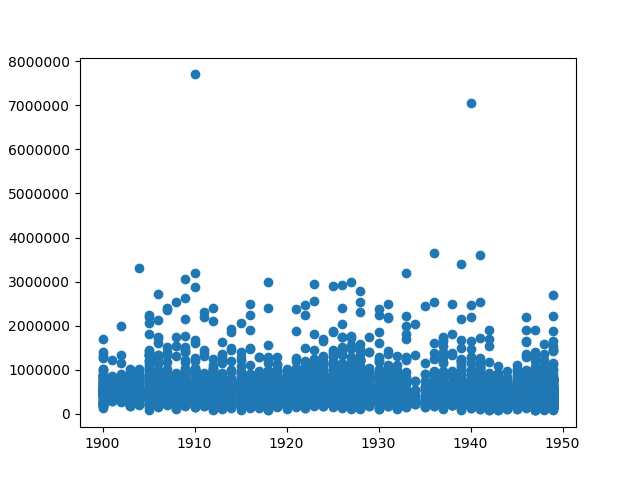

In [8]:
plt.figure()
plt.scatter(old_houses['yr_built'], old_houses['price'])

So most of the old houses are less then 2 milion dollars. Does the renuvation influence that?

In [9]:
renovated_old_houses = old_houses[old_houses.yr_renovated > 0]

In [10]:
len(renovated_old_houses)/len(old_houses) * 100

11.707514685031395

11% of old houses are renovated

<IPython.core.display.Javascript object>


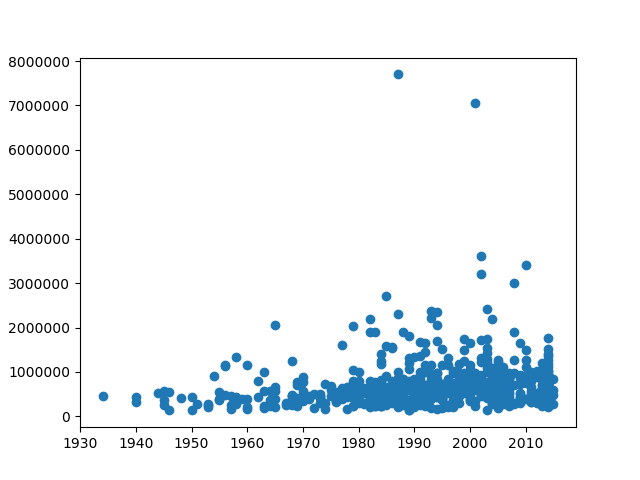

In [11]:
plt.figure()
plt.scatter(renovated_old_houses['yr_renovated'], renovated_old_houses['price'])

It looks like the two most expensive houses that are not expensive only because they are renoated. It seems that there is corelation between year of renovation and prices. Lets see what a line would wook like:

In [12]:
renovated_old_houses_model = LinearRegression(normalize=True)
renovated_old_houses_model.fit(renovated_old_houses['yr_renovated'].values.reshape(-1, 1), renovated_old_houses['price'])
renovated_old_houses_model.coef_[0], renovated_old_houses_model.intercept_

(5248.2834018625217, -9734854.7881953567)

<IPython.core.display.Javascript object>


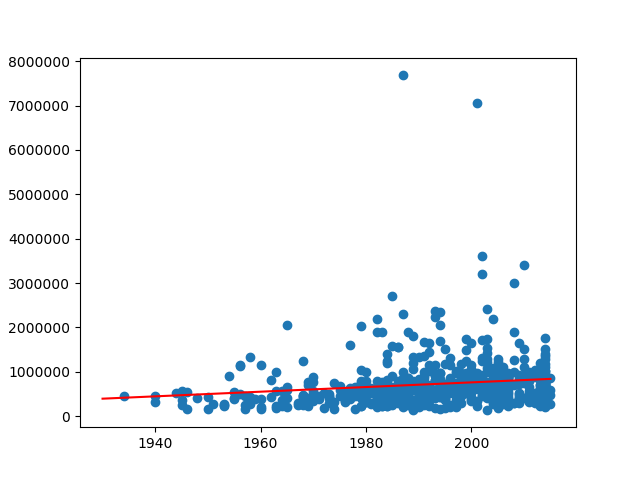

In [13]:
interval = np.linspace(1930, 2015)
result = interval * renovated_old_houses_model.coef_[0] + renovated_old_houses_model.intercept_
plt.figure()
plt.plot(interval, result, '-r')
plt.scatter(renovated_old_houses['yr_renovated'], renovated_old_houses['price'])

In [14]:
renovated_old_houses_model.score(renovated_old_houses['yr_renovated'].values.reshape(-1, 1), renovated_old_houses['price'])

0.021277715539124165

Pritty poor model I would say

In [15]:
from sklearn.model_selection import train_test_split

In [20]:
X, y = all_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view', 'condition', 'grade', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']], all_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15129, 12) (15129,)
(6484, 12) (6484,)


In [25]:
basic_model = LinearRegression(normalize=True)
basic_model.fit(X_train, y_train)
basic_model.score(X_test, y_test)

0.65167385091611185

In [30]:
## TODO